In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'yueyuepannew' ## using kaggle username and key from your kaggle account
os.environ['KAGGLE_KEY'] = '4e8240681106f7bae6adb5e6d894cf14' 

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 93% 193M/207M [00:01<00:00, 79.5MB/s]
100% 207M/207M [00:01<00:00, 119MB/s] 


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [ ]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir, 'Non Mask')

In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])



['0763.jpg', '0019.jpg', '1562.jpg', '0545.jpg', '0761.jpg', '0129.png', '1255.jpg', '1264.jpg', '1555.jpg', '0802.jpg']
['220.jpg', '129.jpg', '48.jpg', '89.jpg', '125.jpg', '201.jpg', '46.jpg', '276.jpg', '282.jpg', '174.jpg']


['/content/New Masks Dataset/Train/Mask/0763.jpg', '/content/New Masks Dataset/Train/Mask/0019.jpg', '/content/New Masks Dataset/Train/Mask/1562.jpg', '/content/New Masks Dataset/Train/Mask/0545.jpg', '/content/New Masks Dataset/Train/Mask/0761.jpg', '/content/New Masks Dataset/Train/Mask/0129.png', '/content/New Masks Dataset/Train/Mask/1255.jpg', '/content/New Masks Dataset/Train/Mask/1264.jpg']
['/content/New Masks Dataset/Train/Non Mask/220.jpg', '/content/New Masks Dataset/Train/Non Mask/129.jpg', '/content/New Masks Dataset/Train/Non Mask/48.jpg', '/content/New Masks Dataset/Train/Non Mask/89.jpg', '/content/New Masks Dataset/Train/Non Mask/125.jpg', '/content/New Masks Dataset/Train/Non Mask/201.jpg', '/content/New Masks Dataset/Train/Non Mask/46.jpg', '/content/New Masks Dataset/Train/Non Mask/276.jpg']


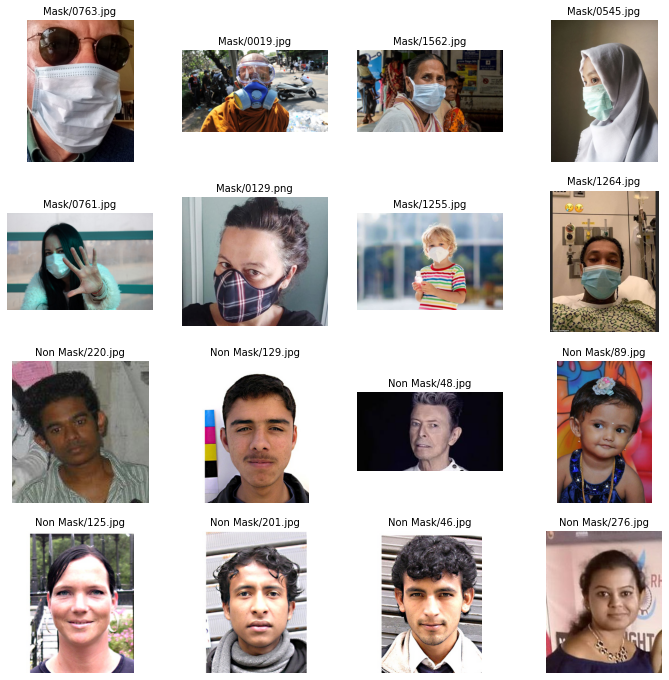

In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize = (12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir, i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir, i))

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic + nomask_pic
for i in range(0,len(merged_list)):
  data = merged_list[i].split('/', 4)[4]
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  image = mpimg.imread(merged_list[i])
  sp.set_title(data, fontsize = 10)
  plt.imshow(image,cmap = 'gray')
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    ) 
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME', activation = 'relu',input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [ ]:
model.compile(Adam(learning_rate=0.001),loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 25s 651ms/step - loss: 2.6031 - accuracy: 0.5517 - val_loss: 0.6857 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 11s 618ms/step - loss: 0.5300 - accuracy: 0.7550 - val_loss: 0.5135 - val_accuracy: 0.7516
Epoch 3/30
19/19 [==============================] - 11s 618ms/step - loss: 0.4408 - accuracy: 0.8083 - val_loss: 0.5331 - val_accuracy: 0.7876
Epoch 4/30
19/19 [==============================] - 12s 610ms/step - loss: 0.3616 - accuracy: 0.8783 - val_loss: 0.5050 - val_accuracy: 0.7712
Epoch 5/30
19/19 [==============================] - 12s 623ms/step - loss: 0.3211 - accuracy: 0.8883 - val_loss: 0.3583 - val_accuracy: 0.8791
Epoch 6/30
19/19 [==============================] - 12s 625ms/step - loss: 0.2716 - accuracy: 0.8967 - val_loss: 0.3971 - val_accuracy: 0.8660
Epoch 7/30
19/19 [==============================] - 11s 615ms/step - loss: 0.2414 - accuracy: 0.9267 - val_loss: 0.3090 - val_accuracy: 0.8954

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

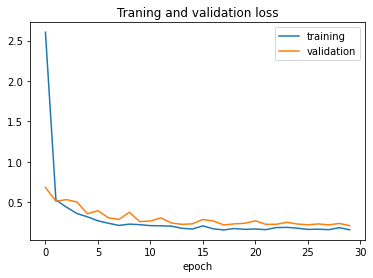

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Traning and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

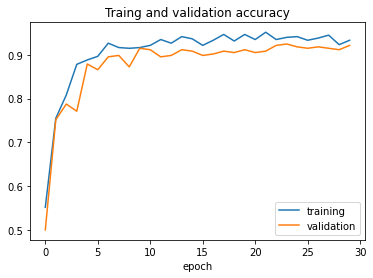

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Traing and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test loss:{} test acc:{}'.format(test_loss, test_acc))

4/4 [==============================] - 1s 269ms/step - loss: 0.1723 - accuracy: 0.9200
test loss:0.17230185866355896 test acc:0.9200000166893005


In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = '/content/'+fname
  img = image.load_img(img_path,target_size=(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)
  print(fname)
  if prediction == 0:
    print('mask')
  else:
    print('no mask')


Saving no mask.jpg to no mask (1).jpg
Saving image.jpg to image (1).jpg
no mask.jpg
no mask
image.jpg
mask


In [ ]:
model.save('mode.h5')